## Heart Failure Prediction Dataset
## Прогнозирование сердечной недостаточности

|Студент | Лошманов Юрий |
|---------|------------|
|Группа | М8О-306Б-19 |
| Номер по списку| 16         |

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import collections
import sklearn
import pickle

In [643]:
data = pd.read_csv('heart.csv')
print(data.shape)
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


1. Age: возраст пациента   
2. Sex: пол пациента (M: Мужчина, F: Женщина)
3. ChestPainType: тип боли в груди   
* TA: Типичная стенокардия
* ATA: Атипичная стенокардия 
* NAP: Неангинальная боль 
* ASY: Бессимптомная
4. RestingBP: кровяное давление в покое (мм рт. ст.)
5. Cholesterol: холестерин (мм/дл)
6. FastingBS: уровень сахара в крови натощак (1: если уровень сахара в крови натощак > 120 мг/дл, 0: в противном случае)
7. RestingECG: результаты электрокардиограммы в покое 
* Normal: Нормальный  
* ST: Наличие аномальных зубцов S и T (отрицательный зубец T и/или отрицательное или положительное отклонение ST > 0.05 мВ)
* LVH: наличие гипертрофии левого желудочка по критериям ЭхоКГ
8. MaxHR: достигнутая максимальная частота сердечных сокращений (числовое значение от 60 до 202)
9. ExerciseAngina: стенокардия, вызванная физической нагрузкой (Y: да, N: нет)
10. Oldpeak: числовое значение ST, измеренное в депрессии 
11. ST_Slope: наклон сегмента ST при пиковой нагрузке 
* Down: наклон вниз
* Flat: нет наклона (плоский)
* Up наклон вверх
12. HeartDisease: Сердечная недостаточность: выходной класс (1: болезнь сердца, 0: норма)

In [644]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Сделаем числовое отображение: 
* пол пациена (0 - мужчина, 1 - женщина)   
* тип боли в груди (0 - TA, 1 - ATA, 2 - NAP, 3 - ASY)
* результаты ЭКГ в покое (0 - Normal, 1 - ST, 2 - LVH)
* стенокардия, вызванная физической нагрузкой (1 - да, 0 - нет)
* наклон сегмента ST при пиковой нагрузке (0 - Down, 1 - Flat, 2 - Up)

In [645]:
data["Sex"] = [0 if i == "M" else 1 for i in data["Sex"]]
data["ChestPainType"] = [0 if i == "TA" else 1 if i == "ATA" else 2 if i == "NAP" else 3 for i in data["ChestPainType"]]
data["RestingECG"] = [0 if i == "Normal" else 1 if i == "ST" else 2 for i in data["RestingECG"]]
data["ExerciseAngina"] = [0 if i == "N" else 1 for i in data["ExerciseAngina"]]
data["ST_Slope"] = [0 if i == "Down" else 1 if i == "Flat" else 2 for i in data["ST_Slope"]]

In [646]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,2,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,2,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,2,0


Удалим дубликаты, если они есть

In [647]:
data.drop_duplicates(keep='last')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,2,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,2,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [648]:
print(data.shape)

(918, 12)


In [649]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,-0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,-0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,-0.501921,0.403951


<AxesSubplot:>

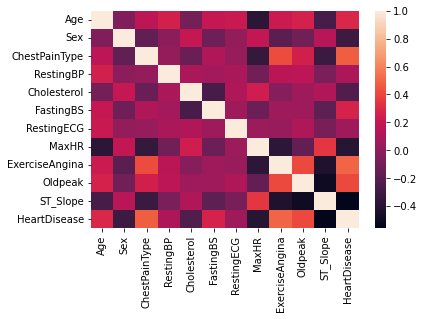

In [650]:
sns.heatmap(data.corr())

Больше всего влияют: ST_Slope, ExerciseAngina, ChestPainType  
Меньше всего: RestingECG

In [651]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


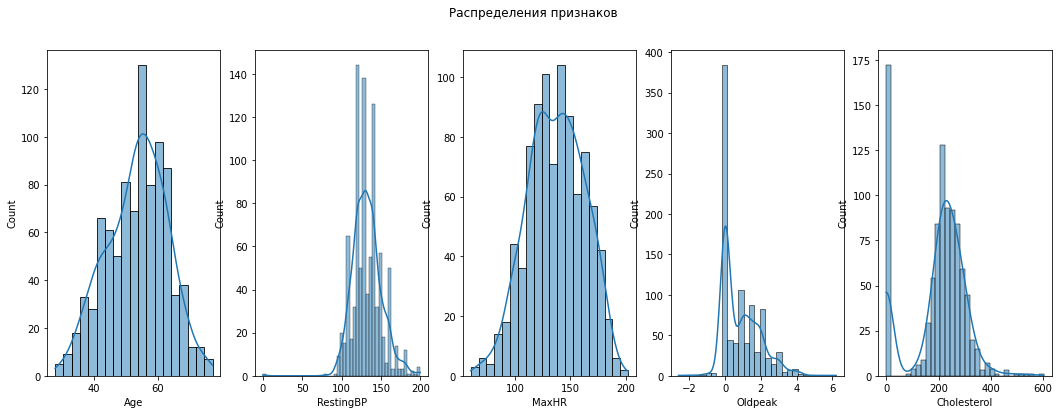

In [652]:
fig, ax = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Age'], ax = ax[0], kde = True)
sns.histplot(data['RestingBP'], ax = ax[1], kde = True)
sns.histplot(data['MaxHR'], ax = ax[2], kde = True)
sns.histplot(data['Oldpeak'], ax = ax[3], kde = True)
sns.histplot(data['Cholesterol'], ax = ax[4], kde = True)
None

Имеются выбросы в виде холестерина равного 0. Это физически невозможно. Возьмем как среднее для больных и здорвых, так как данных и так мало.

In [653]:
a = data[(data['Cholesterol'] != 0) & (data['HeartDisease'] == 1)]['Cholesterol'].mean()
b = data[(data['Cholesterol'] != 0) & (data['HeartDisease'] == 0)]['Cholesterol'].mean()


for i in range(data.shape[0]):
    if data['Cholesterol'][i] == 0 and data['HeartDisease'][i] == 1:
        data.at[i, 'Cholesterol'] = a
    if data['Cholesterol'][i] == 0 and data['HeartDisease'][i] == 0:
        data.at[i, 'Cholesterol'] = b

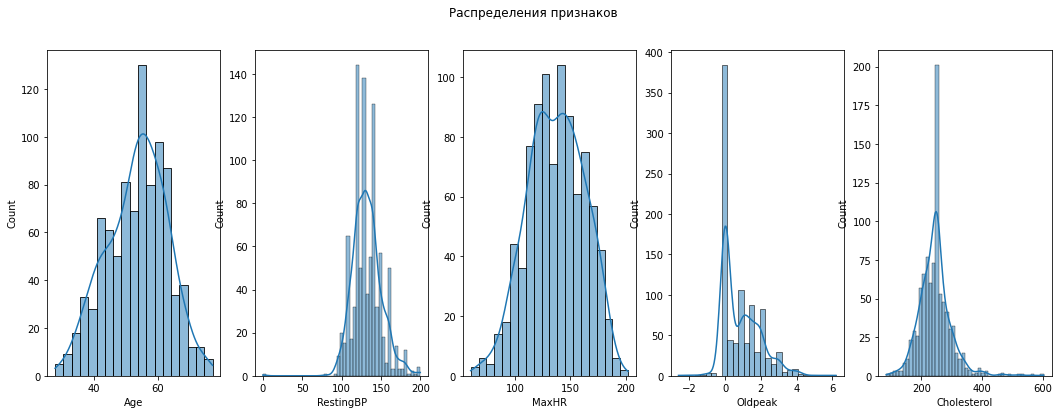

In [654]:
fig, ax = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Age'], ax = ax[0], kde = True)
sns.histplot(data['RestingBP'], ax = ax[1], kde = True)
sns.histplot(data['MaxHR'], ax = ax[2], kde = True)
sns.histplot(data['Oldpeak'], ax = ax[3], kde = True)
sns.histplot(data['Cholesterol'], ax = ax[4], kde = True)
None

Теперь данные более соответствуют реальности

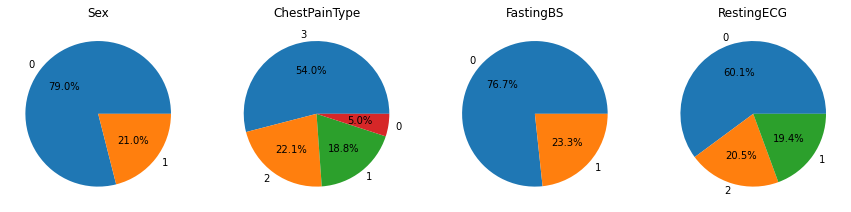

In [655]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 4, 1)
plt.pie(data["Sex"].value_counts(), labels = data["Sex"].value_counts().index, autopct='%1.1f%%')
plt.title("Sex")

plt.subplot(1, 4, 2)
plt.pie(data["ChestPainType"].value_counts(), labels = data["ChestPainType"].value_counts().index, autopct='%1.1f%%')
plt.title("ChestPainType")

plt.subplot(1, 4, 3)
plt.pie(data["FastingBS"].value_counts(), labels = data["FastingBS"].value_counts().index, autopct='%1.1f%%')
plt.title("FastingBS")

plt.subplot(1, 4, 4)
plt.pie(data["RestingECG"].value_counts(), labels = data["RestingECG"].value_counts().index, autopct='%1.1f%%')
plt.title("RestingECG")

plt.show()

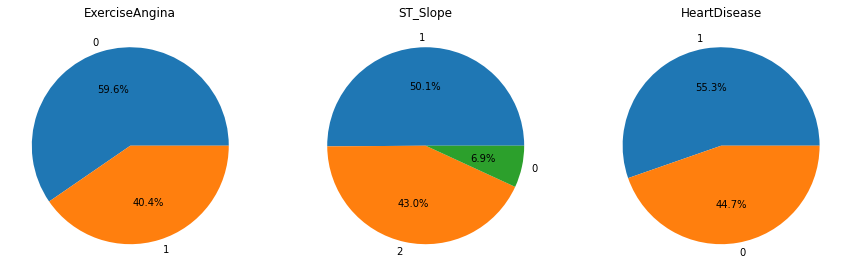

In [656]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 1)
plt.pie(data["ExerciseAngina"].value_counts(), labels = data["ExerciseAngina"].value_counts().index, autopct='%1.1f%%')
plt.title("ExerciseAngina")

plt.subplot(1, 3, 2)
plt.pie(data["ST_Slope"].value_counts(), labels = data["ST_Slope"].value_counts().index, autopct='%1.1f%%')
plt.title("ST_Slope")

plt.subplot(1, 3, 3)
plt.pie(data["HeartDisease"].value_counts(), labels = data["HeartDisease"].value_counts().index, autopct='%1.1f%%')
plt.title("HeartDisease")
plt.show()

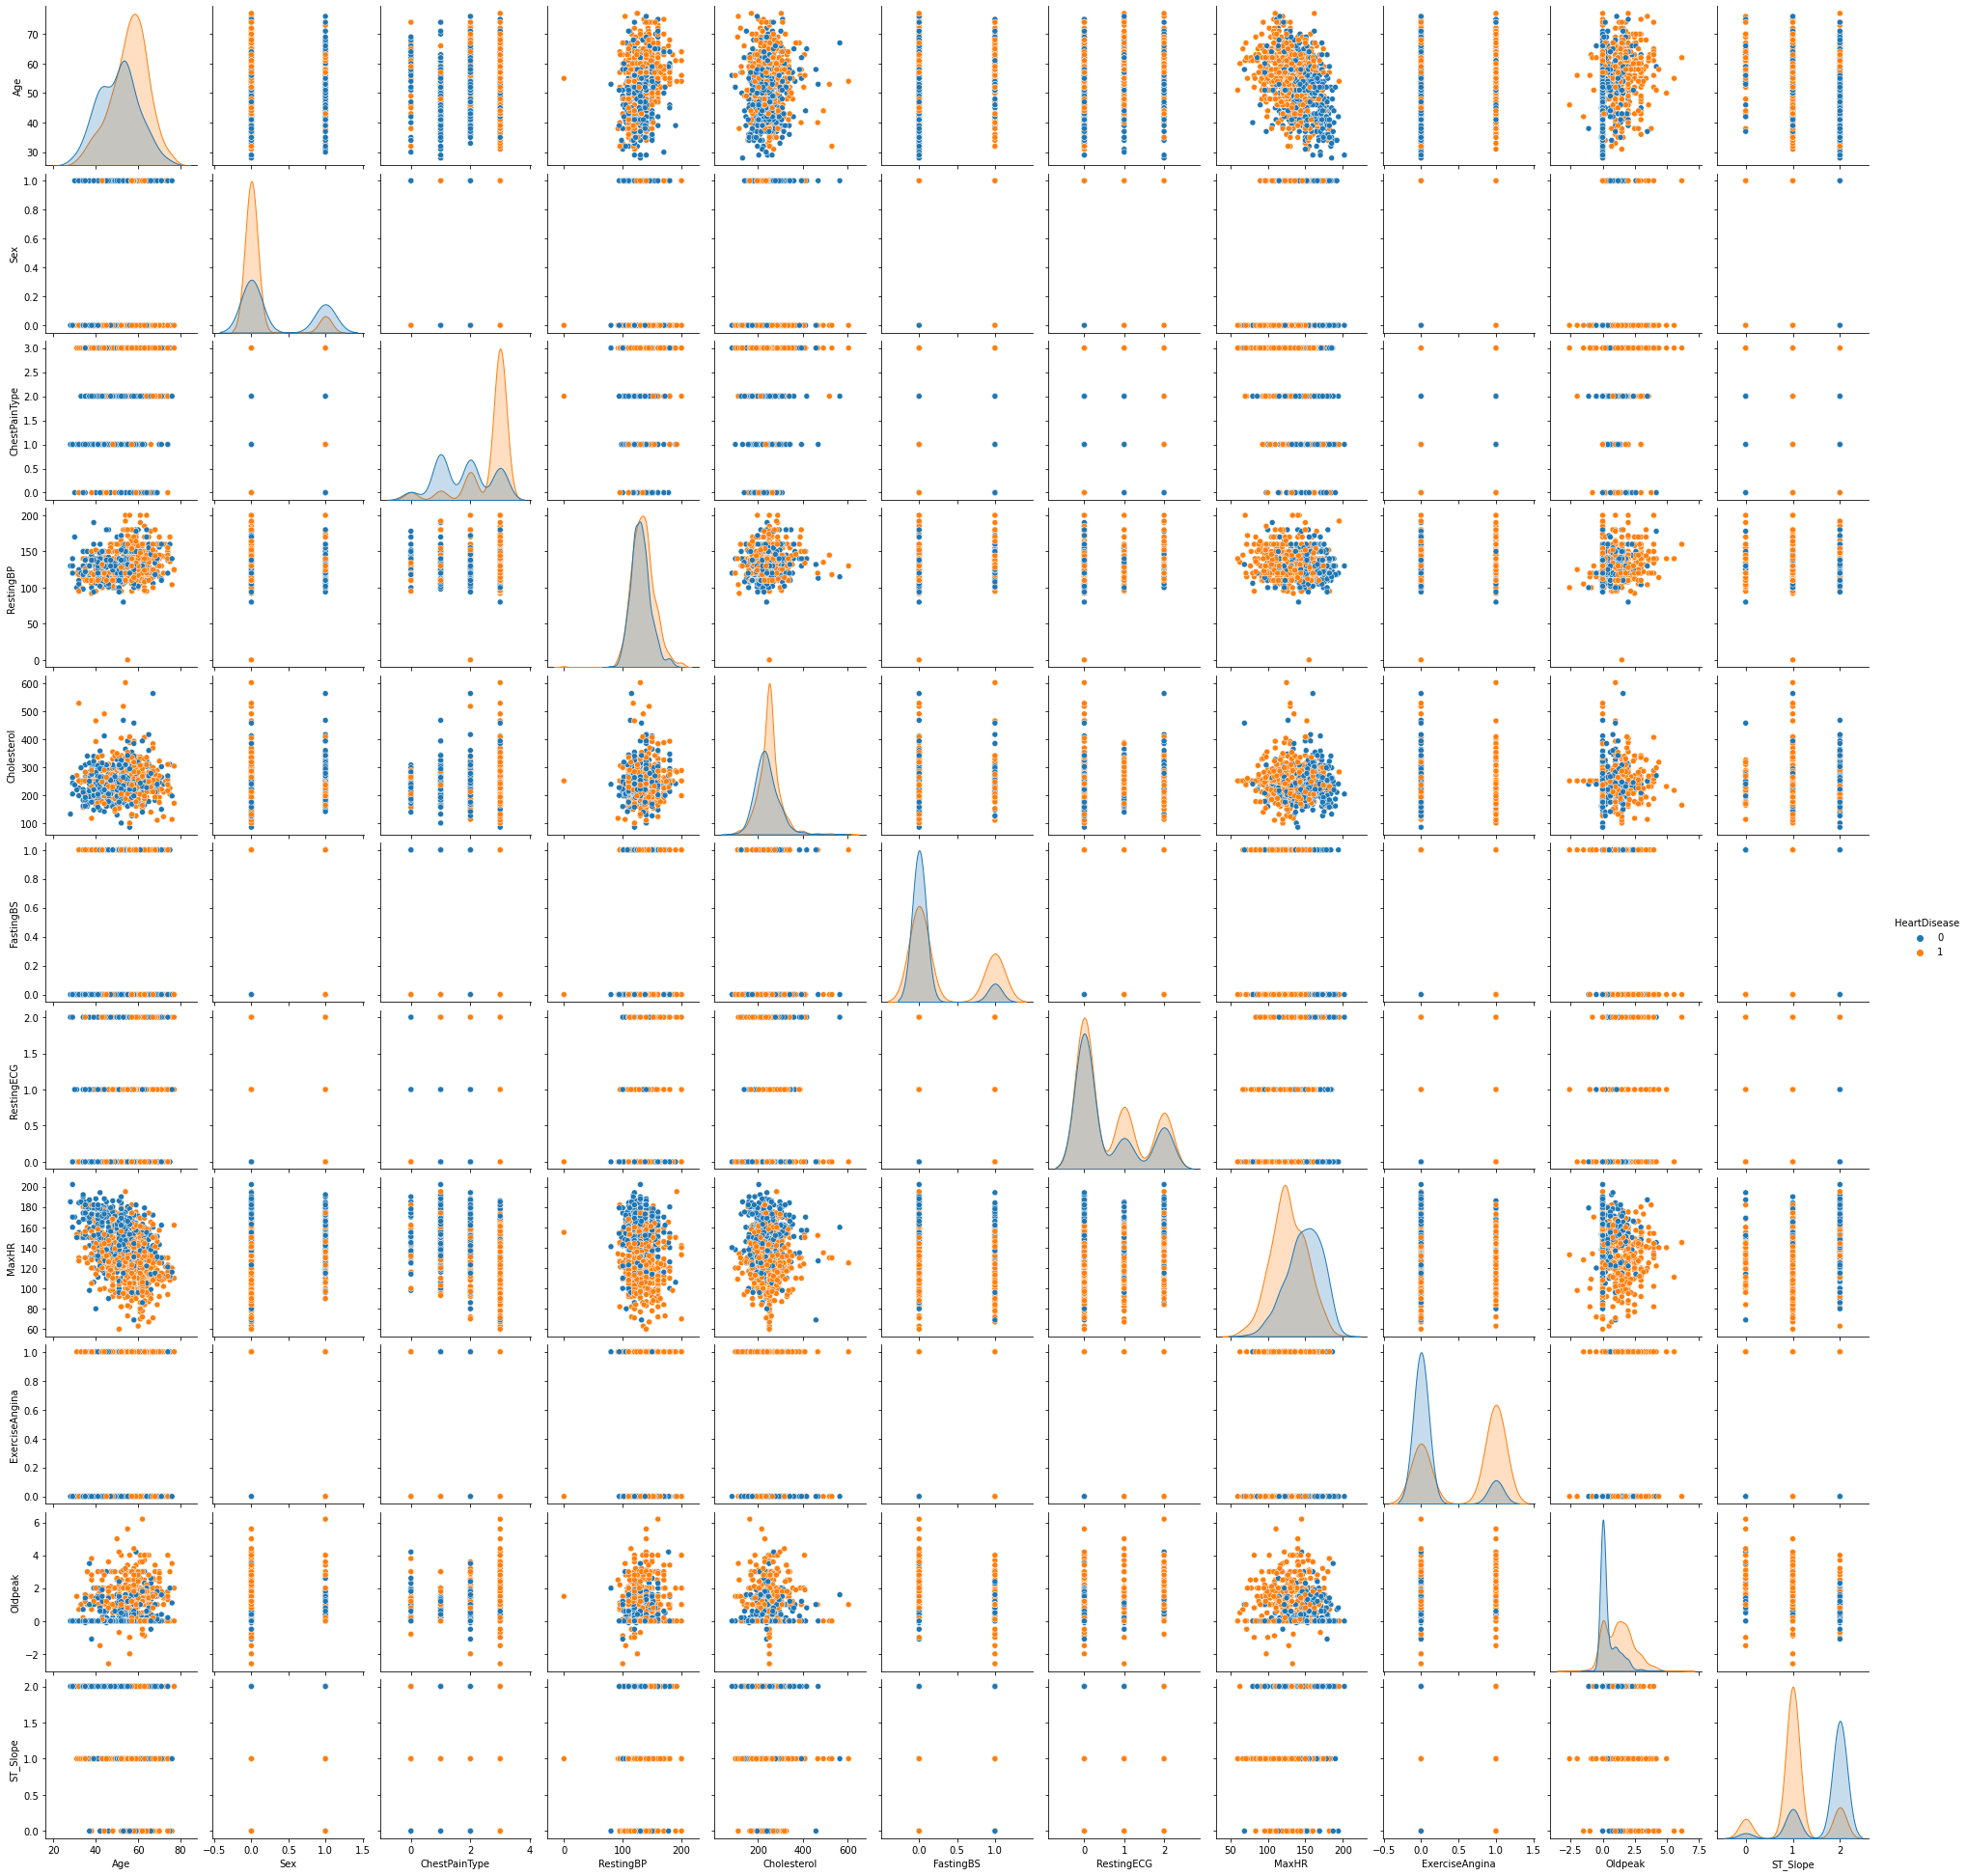

In [657]:
sns.pairplot(data=data, hue='HeartDisease')
None

# k-Nearest Neighbors (KNN)

In [658]:
from sklearn.model_selection import train_test_split
x = data.drop(columns='HeartDisease')
y = data['HeartDisease']
x_train, x_test, train_labels, test_labels = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.2, random_state = 10)

In [659]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        
    def euclidean_distance(self, row1, row2):
        distance = 0
        for i in range(len(row1)): 
            distance += (row1[i] - row2[i]) ** 2
        return math.sqrt(distance)
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            distances = []
            for i, row in enumerate(self.data):
                distances.append((self.euclidean_distance(data, row), self.labels[i]))
            distances.sort(key = lambda tup: tup[0])
            dictionary = collections.defaultdict(int)
            for i in range(self.k):
                dictionary[distances[i][1]] += 1
            res[j] = max(dictionary.items(), key = lambda tup: tup[1])[0]
        return res

In [660]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay

knn = Pipeline(steps = [('knn', KNN(4))])
print(knn.get_params())

{'memory': None, 'steps': [('knn', KNN(k=4))], 'verbose': False, 'knn': KNN(k=4), 'knn__k': 4}


In [661]:
def Print_scores(test_labels, x_test_predict):
    print(f"Accuracy tests: {accuracy_score(test_labels, x_test_predict)}")
    matrix = confusion_matrix(test_labels, x_test_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
    disp.plot()
    plt.show()
    print(f"Precision tests: {precision_score(test_labels, x_test_predict)}")
    print(f"Recall tests: {recall_score(test_labels, x_test_predict)}")
    RocCurveDisplay.from_predictions(test_labels, x_test_predict)
    plt.show()

{'knn__k': 20}
Accuracy train: 0.7111173236417855
Accuracy tests: 0.7119565217391305


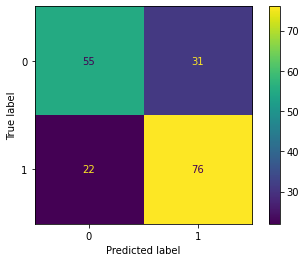

Precision tests: 0.7102803738317757
Recall tests: 0.7755102040816326


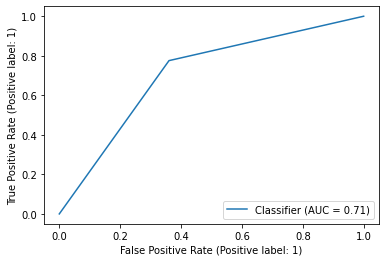

In [662]:
test = []

for i in range(1, 25):
    test.append(i)

gcv = GridSearchCV(estimator = knn, param_grid={'knn__k': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

{'knn__k': 20}
Accuracy train: 0.7111173236417855
Accuracy tests: 0.7119565217391305


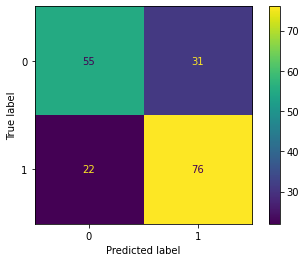

Precision tests: 0.7102803738317757
Recall tests: 0.7755102040816326


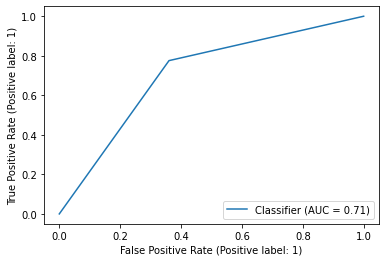

In [663]:
rcv = RandomizedSearchCV(estimator = knn, param_distributions={'knn__k': test})
rcv.fit(x_train, train_labels)
print(rcv.best_params_)
print(f"Accuracy train: {rcv.best_score_}")
x_test_predict = rcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [664]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps = [('knn', KNeighborsClassifier(4))])
print(knn.get_params())

{'memory': None, 'steps': [('knn', KNeighborsClassifier(n_neighbors=4))], 'verbose': False, 'knn': KNeighborsClassifier(n_neighbors=4), 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 4, 'knn__p': 2, 'knn__weights': 'uniform'}


{'knn__n_neighbors': 22}
Accuracy train: 0.7083589600223651
Accuracy tests: 0.7119565217391305


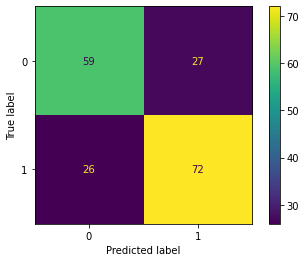

Precision tests: 0.7272727272727273
Recall tests: 0.7346938775510204


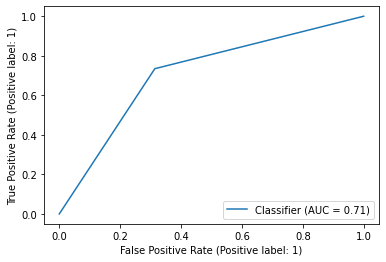

In [665]:
gcv = GridSearchCV(estimator = knn, param_grid={'knn__n_neighbors': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

# Naive Bayes

In [666]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, bins):
        self.bins = bins
        pass
    
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.classes = []
        for j in np.unique(labels):
            
            self.classes.append([])
            for i in range (data.shape[1]):
                self.classes[j].append([*np.histogram(data[labels == j, i], bins = self.bins)])
                self.classes[j][-1][0] = self.classes[j][-1][0].astype('float64') / len(data[labels == j, i])
        
        self.prclasses = np.unique(labels, return_counts = True)[1] / len(labels)
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            maximum = 0
            ans = 0
            for i in range(len(self.classes)):
                p = self.prclasses[i]
                for k in range(len(self.classes[i])):
                    ind = np.digitize(data[k], self.classes[i][k][1])
                    
                    if ind >= len(self.classes[i][k][1]) or ind <= 0:
                        p = 0
                    else:
                        p *= self.classes[i][k][0][ind - 1]
                    
                if p > maximum:
                    maximum = p
                    ans = i
            res[j] = ans
        return res  

In [667]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', NaiveBayes(10))])
bn.get_params()

{'memory': None,
 'steps': [('normalizer', Normalizer()), ('bn', NaiveBayes(bins=10))],
 'verbose': False,
 'normalizer': Normalizer(),
 'bn': NaiveBayes(bins=10),
 'normalizer__copy': True,
 'normalizer__norm': 'l2',
 'bn__bins': 10}

{'bn__bins': 2}
Accuracy train: 0.8365203615692852
Accuracy tests: 0.8097826086956522


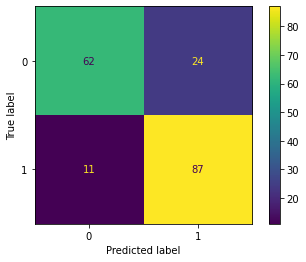

Precision tests: 0.7837837837837838
Recall tests: 0.8877551020408163


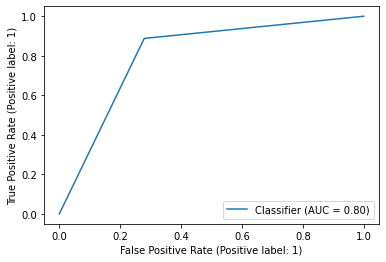

In [668]:
test = []
for i in range(2, 100):
    test.append(i)

gcv = GridSearchCV(estimator = bn, param_grid={'bn__bins': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [669]:
from sklearn.base import BaseEstimator, ClassifierMixin

class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        self.mathexp = []
        self.variance = []
        self.classes = []
        
        for j in np.unique(labels):
            self.classes.append(j)
            self.mathexp.append(data[labels == j,].mean(axis = 0))
            self.variance.append(data[labels == j,].var(axis = 0))
        
    def predict(self, maindata):
        res = np.ndarray((maindata.shape[0],))
        for j, data in enumerate(maindata):
            maximum = 0
            ans = 0
            for i in range(len(self.classes)):
                t = np.exp((-1/2) * ((data - self.mathexp[i]) ** 2) / (2 * self.variance[i])) / np.sqrt(2 * np.pi *  self.variance[i])
                t = np.cumprod(t) 
                if t[-1] > maximum:
                    maximum = t[-1]
                    ans = self.classes[i]
            res[j] = ans
        return res  

Accuracy tests: 0.8206521739130435


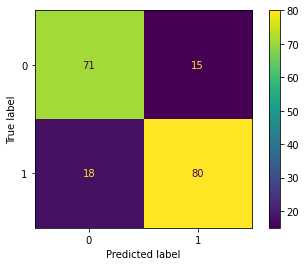

Precision tests: 0.8421052631578947
Recall tests: 0.8163265306122449


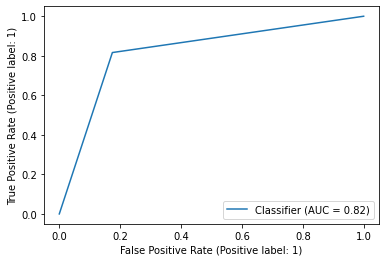

In [670]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', GaussianNaiveBayes())])
bn.fit(x_train, train_labels)
x_test_predict = bn.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [671]:
with open('best_bayes.pickle', 'wb') as f:
    pickle.dump(bn, f, pickle.HIGHEST_PROTOCOL)

Accuracy tests: 0.8369565217391305


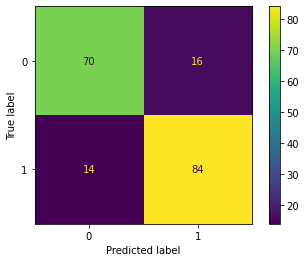

Precision tests: 0.84
Recall tests: 0.8571428571428571


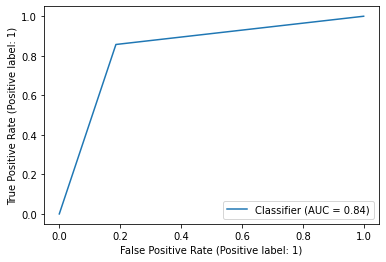

In [672]:
from sklearn.naive_bayes import GaussianNB

bn = Pipeline(steps = [('normalizer', Normalizer()),('bn', GaussianNB())])
bn.fit(x_train, train_labels)
x_test_predict = bn.predict(x_test)
Print_scores(test_labels, x_test_predict)

# Linear/ Logistic Regression

In [673]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Linear(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, nepoch, batch_size):
        self.lr = lr
        self.nepoch = nepoch
        self.batch_size = batch_size
        pass
    
    def sigmoid(self, x):
        self.l = 1 / (1 + np.exp(-x))
        return self.l
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis = 1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                p = np.dot(self.W, xb.T)
                s = self.sigmoid(p)
                dp = np.dot(xb.T, (s - yb).T)
                self.W -= self.lr * dp
        
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis = 1)
        p = np.dot(self.W, maindata.T)
        s = self.sigmoid(p)
        return (s > 0.5).astype('int64')


In [674]:
import sklearn
from sklearn.preprocessing import Normalizer

lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', Linear(0.1, 10, 5))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', Linear(batch_size=5, lr=0.1, nepoch=10))], 'verbose': False, 'normalizer': Normalizer(), 'lin': Linear(batch_size=5, lr=0.1, nepoch=10), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__batch_size': 5, 'lin__lr': 0.1, 'lin__nepoch': 10}


{'lin__batch_size': 10, 'lin__lr': 0.1, 'lin__nepoch': 20}
Accuracy train: 0.6756686236138292
Accuracy tests: 0.6413043478260869


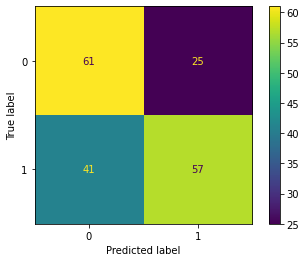

Precision tests: 0.6951219512195121
Recall tests: 0.5816326530612245


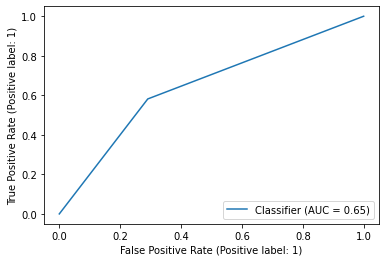

In [675]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

{'lin__nepoch': 5, 'lin__lr': 0.1, 'lin__batch_size': 10}
Accuracy train: 0.6619979498648775
Accuracy tests: 0.657608695652174


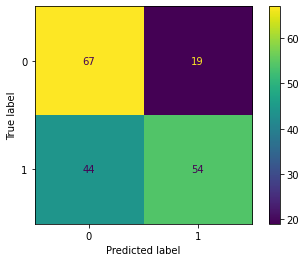

Precision tests: 0.7397260273972602
Recall tests: 0.5510204081632653


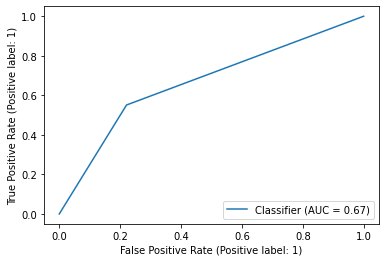

In [676]:
rcv = RandomizedSearchCV(estimator = lin, param_distributions={'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
rcv.fit(x_train, train_labels)
print(rcv.best_params_)
print(f"Accuracy train: {rcv.best_score_}")
x_test_predict = rcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [677]:
from sklearn.linear_model import SGDClassifier

lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SGDClassifier(loss = 'log'))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SGDClassifier(loss='log'))], 'verbose': False, 'normalizer': Normalizer(), 'lin': SGDClassifier(loss='log'), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__alpha': 0.0001, 'lin__average': False, 'lin__class_weight': None, 'lin__early_stopping': False, 'lin__epsilon': 0.1, 'lin__eta0': 0.0, 'lin__fit_intercept': True, 'lin__l1_ratio': 0.15, 'lin__learning_rate': 'optimal', 'lin__loss': 'log', 'lin__max_iter': 1000, 'lin__n_iter_no_change': 5, 'lin__n_jobs': None, 'lin__penalty': 'l2', 'lin__power_t': 0.5, 'lin__random_state': None, 'lin__shuffle': True, 'lin__tol': 0.001, 'lin__validation_fraction': 0.1, 'lin__verbose': 0, 'lin__warm_start': False}


{'lin__alpha': 0.0001, 'lin__max_iter': 1000}
Accuracy train: 0.7206038579815488
Accuracy tests: 0.6195652173913043


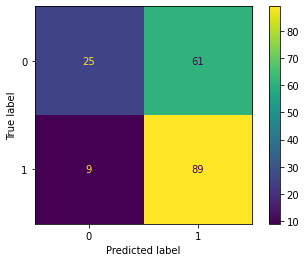

Precision tests: 0.5933333333333334
Recall tests: 0.9081632653061225


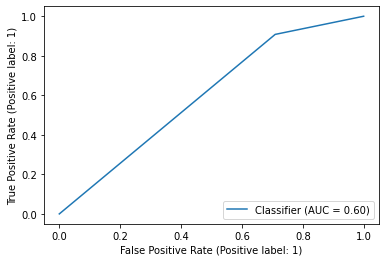

In [678]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__max_iter': [100, 1000, 1500], 'lin__alpha': [0.1, 0.001, 0.0001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

# SVM

In [679]:
test_labels[test_labels == 0] = -1
train_labels[train_labels == 0] = -1

In [680]:
from sklearn.base import BaseEstimator, ClassifierMixin
class SVM(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, lambd,  batch_size, nepoch):
        self.nepoch = nepoch
        self.lr = lr
        self.lambd = lambd
        self.batch_size = batch_size
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis=1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                
                p = np.dot(self.W, xb.T)

                sums = np.zeros_like(self.W)
                for i in range(len(p)):
                    if 1 - p[i] * yb[i] > 0:
                        sums -= xb[i] * yb[i]

                dp = 2 * self.lambd * self.W + sums
                self.W -= self.lr * dp
                
                
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis=1)
        p = np.dot(self.W, maindata.T)
        return np.sign(p)
        
    

In [681]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SVM(0.03, 0.00001, 10, 10))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SVM(batch_size=10, lambd=1e-05, lr=0.03, nepoch=10))], 'verbose': False, 'normalizer': Normalizer(), 'lin': SVM(batch_size=10, lambd=1e-05, lr=0.03, nepoch=10), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__batch_size': 10, 'lin__lambd': 1e-05, 'lin__lr': 0.03, 'lin__nepoch': 10}


{'lin__batch_size': 5, 'lin__lambd': 1e-05, 'lin__lr': 0.1, 'lin__nepoch': 5}
Accuracy train: 0.6688006709533129
Accuracy tests: 0.6032608695652174


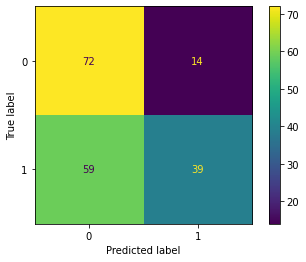

Precision tests: 0.7358490566037735
Recall tests: 0.3979591836734694


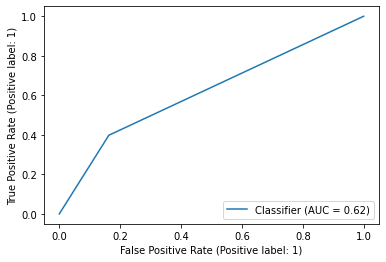

In [682]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__lambd': [0, 0.00001, 0.001, 0.1], 'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

{'lin__nepoch': 5, 'lin__lr': 0.1, 'lin__lambd': 0.001, 'lin__batch_size': 5}
Accuracy train: 0.6647190383002517
Accuracy tests: 0.6141304347826086


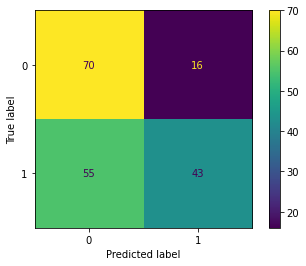

Precision tests: 0.7288135593220338
Recall tests: 0.4387755102040816


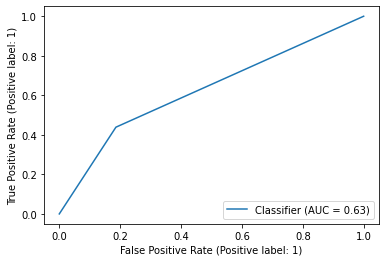

In [683]:
rcv = RandomizedSearchCV(estimator = lin, param_distributions={'lin__lambd': [0, 0.00001, 0.001, 0.1], 'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
rcv.fit(x_train, train_labels)
print(rcv.best_params_)
print(f"Accuracy train: {rcv.best_score_}")
x_test_predict = rcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [684]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SGDClassifier(loss = 'hinge'))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SGDClassifier())], 'verbose': False, 'normalizer': Normalizer(), 'lin': SGDClassifier(), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__alpha': 0.0001, 'lin__average': False, 'lin__class_weight': None, 'lin__early_stopping': False, 'lin__epsilon': 0.1, 'lin__eta0': 0.0, 'lin__fit_intercept': True, 'lin__l1_ratio': 0.15, 'lin__learning_rate': 'optimal', 'lin__loss': 'hinge', 'lin__max_iter': 1000, 'lin__n_iter_no_change': 5, 'lin__n_jobs': None, 'lin__penalty': 'l2', 'lin__power_t': 0.5, 'lin__random_state': None, 'lin__shuffle': True, 'lin__tol': 0.001, 'lin__validation_fraction': 0.1, 'lin__verbose': 0, 'lin__warm_start': False}


{'lin__alpha': 0.0001, 'lin__max_iter': 1500}
Accuracy train: 0.6933836548317958
Accuracy tests: 0.6521739130434783


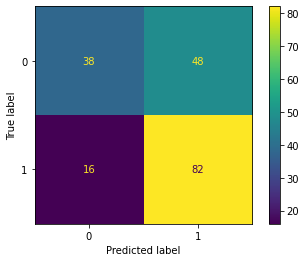

Precision tests: 0.6307692307692307
Recall tests: 0.8367346938775511


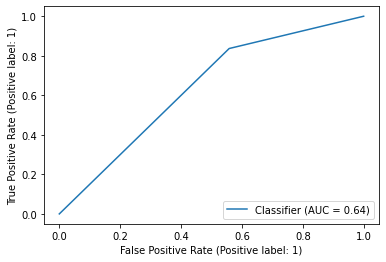

In [685]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__max_iter': [100, 1000, 1500], 'lin__alpha': [0.1, 0.001, 0.0001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

Как оказалось, линейная модель работает не очень хорошо. Попробуем объединить признаки.

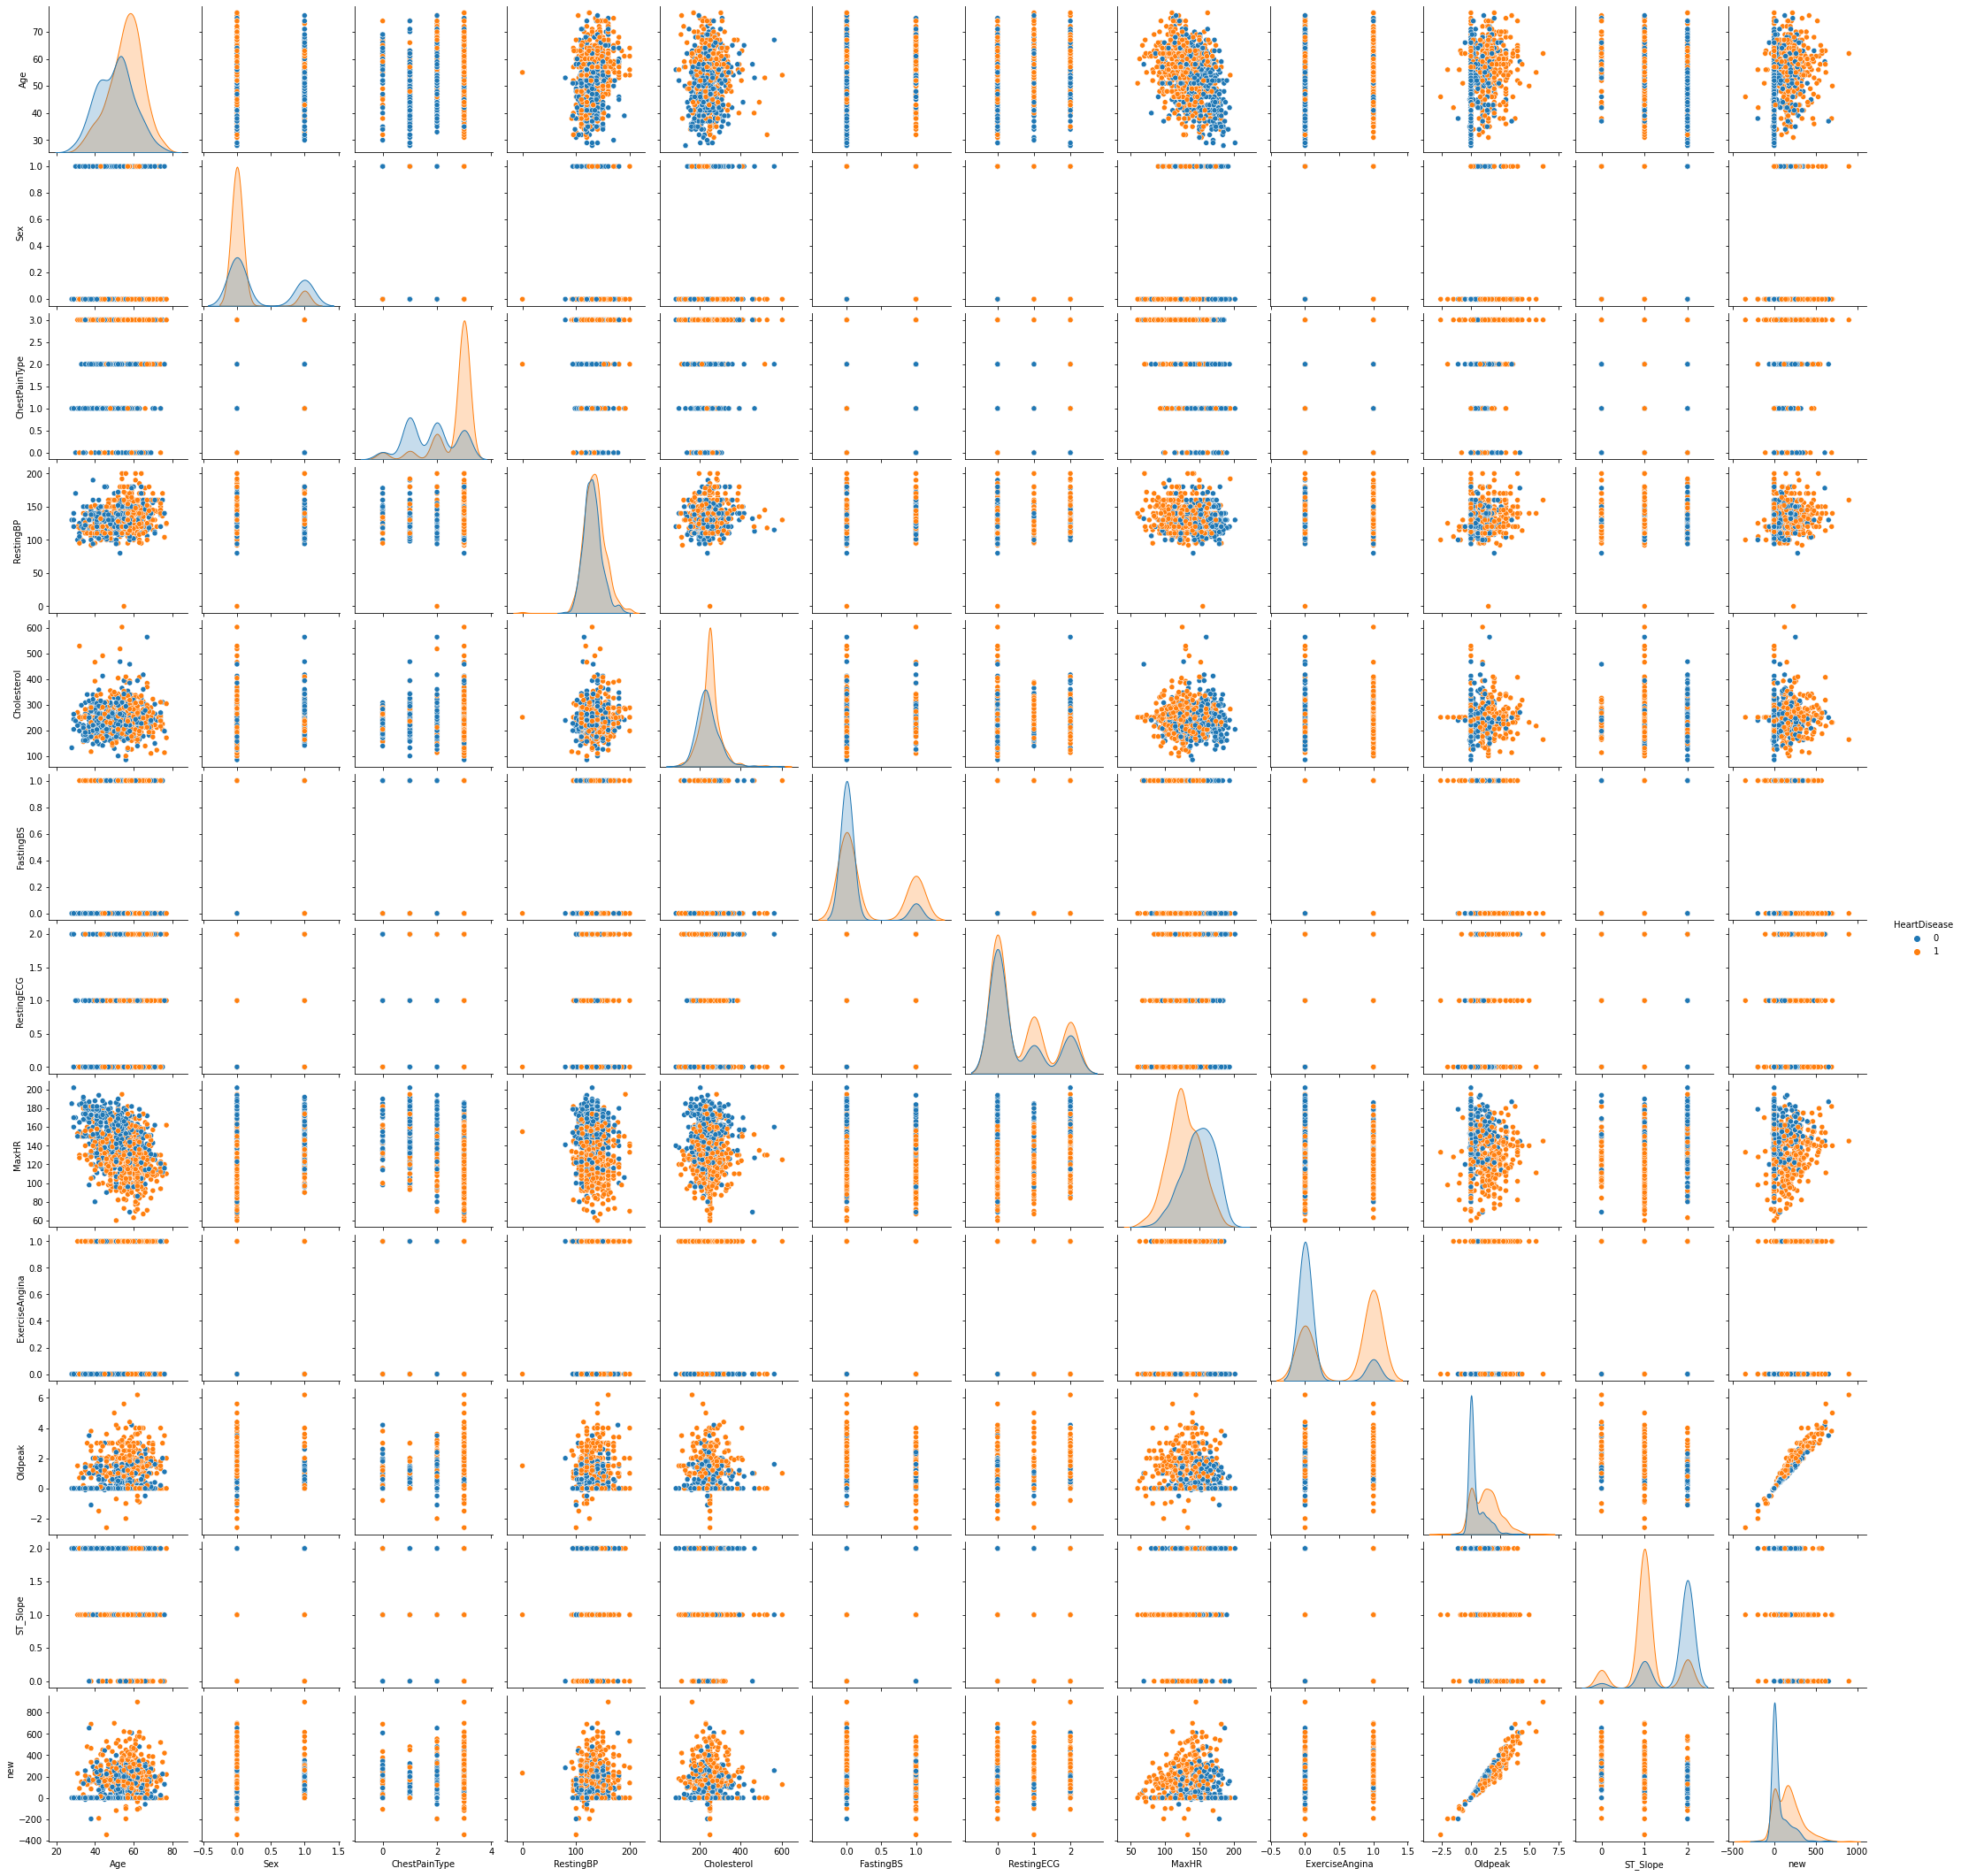

In [686]:
data['new'] = data['MaxHR'] * data['Oldpeak'] 
sns.pairplot(data = data, hue = 'HeartDisease')

In [687]:
from sklearn.model_selection import train_test_split
x = data.drop(columns='HeartDisease')
y = data['HeartDisease']
x_train, x_test, train_labels, test_labels = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.2, random_state = 10)

{'lin__batch_size': 5, 'lin__lr': 0.1, 'lin__nepoch': 20}
Accuracy train: 0.7233715403969807
Accuracy tests: 0.7228260869565217


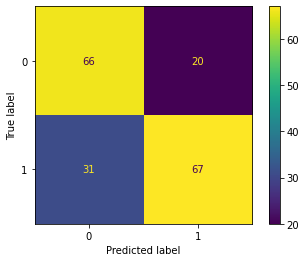

Precision tests: 0.7701149425287356
Recall tests: 0.6836734693877551


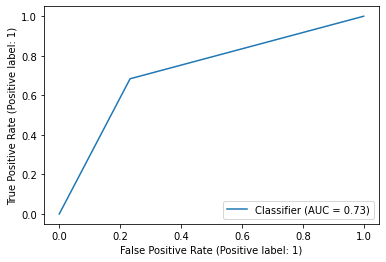

In [688]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', Linear(0.1, 10, 5))])
gcv = GridSearchCV(estimator = lin, param_grid={'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [689]:
with open('best_linear.pickle', 'wb') as f:
    pickle.dump(gcv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

{'knn__k': 17}
Accuracy train: 0.7615786040443575
Accuracy tests: 0.7554347826086957


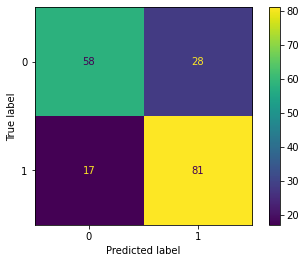

Precision tests: 0.7431192660550459
Recall tests: 0.826530612244898


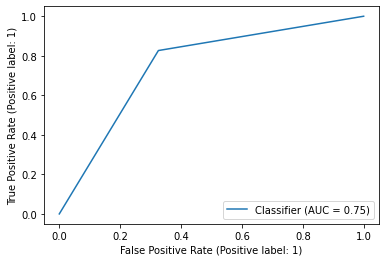

In [690]:
knn = Pipeline(steps = [('knn', KNN(4))])
test = []

for i in range(1, 25):
    test.append(i)

gcv = GridSearchCV(estimator = knn, param_grid={'knn__k': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [691]:
with open('best_knn.pickle', 'wb') as f:
    pickle.dump(gcv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

{'bn__bins': 2}
Accuracy train: 0.8065045196160655
Accuracy tests: 0.7880434782608695


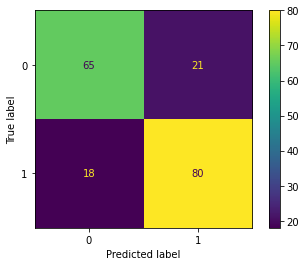

Precision tests: 0.7920792079207921
Recall tests: 0.8163265306122449


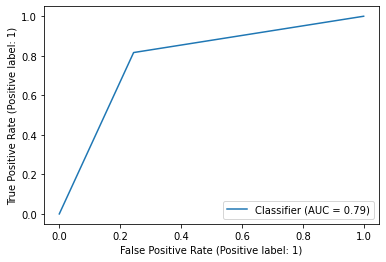

In [692]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', NaiveBayes(10))])
test = []
for i in range(2, 100):
    test.append(i)

gcv = GridSearchCV(estimator = bn, param_grid={'bn__bins': test})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

Accuracy tests: 0.7989130434782609


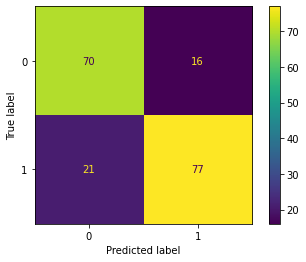

Precision tests: 0.8279569892473119
Recall tests: 0.7857142857142857


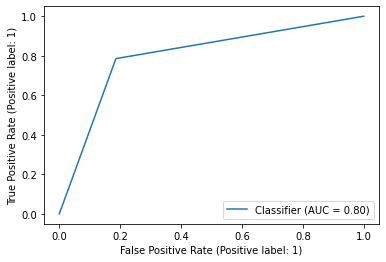

In [693]:
bn = Pipeline(steps = [('normalizer', Normalizer()), ('bn', GaussianNaiveBayes())])
bn.fit(x_train, train_labels)
x_test_predict = bn.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [694]:
test_labels[test_labels == 0] = -1
train_labels[train_labels == 0] = -1

{'lin__batch_size': 10, 'lin__lambd': 1e-05, 'lin__lr': 0.1, 'lin__nepoch': 20}
Accuracy train: 0.7247227658186562
Accuracy tests: 0.6956521739130435


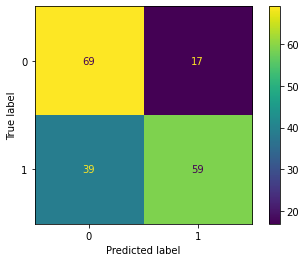

Precision tests: 0.7763157894736842
Recall tests: 0.6020408163265306


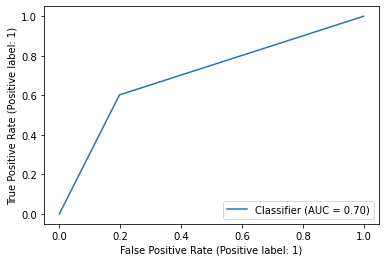

In [695]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SVM(0.01, 0.01, 10, 3))])
lin.fit(x_train, train_labels)

gcv = GridSearchCV(estimator = lin, param_grid={'lin__lambd': [0, 0.00001, 0.001, 0.1], 'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [696]:
with open('best_svm.pickle', 'wb') as f:
    pickle.dump(gcv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)

Как видно, обычная линейные модели и knn стали работать лучше, когда как остальные хуже